# 23. Seaborn - Statistical Data Visualization

**Details:**
- Seaborn is a high-level statistical visualization library built on matplotlib
- Provides beautiful default styles and color palettes
- Seamlessly integrates with pandas DataFrames
- Specialized in statistical graphics with built-in datasets
- Offers powerful functions for distribution, categorical, and relational plots

**Use Cases:**
- Statistical analysis visualization
- Exploratory data analysis (EDA)
- Multi-dimensional data exploration
- Publication-ready statistical graphics

## 1. Import and Setup

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

print(f"Seaborn version: {sns.__version__}")
print(f"Matplotlib version: {plt.matplotlib.__version__}")
print("Seaborn: High-level statistical visualization built on matplotlib")
print("Key advantages: Beautiful defaults, statistical focus, DataFrame integration")

# Set default seaborn theme
sns.set_theme(style="darkgrid")

Seaborn version: 0.13.2
Matplotlib version: 3.10.6
Seaborn: High-level statistical visualization built on matplotlib
Key advantages: Beautiful defaults, statistical focus, DataFrame integration


## 2. Distribution Plots - Histogram and KDE

**Details:**
- `histplot()`: Histogram with optional KDE overlay
- `kdeplot()`: Kernel Density Estimation for smooth distributions
- `hue` parameter: Color-code by categorical variable
- Useful for understanding data distribution and density

**Use Cases:**
- Analyzing bill amounts by time of day
- Comparing distributions across categories
- Identifying distribution patterns and outliers

Tips dataset shape: (244, 7)
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


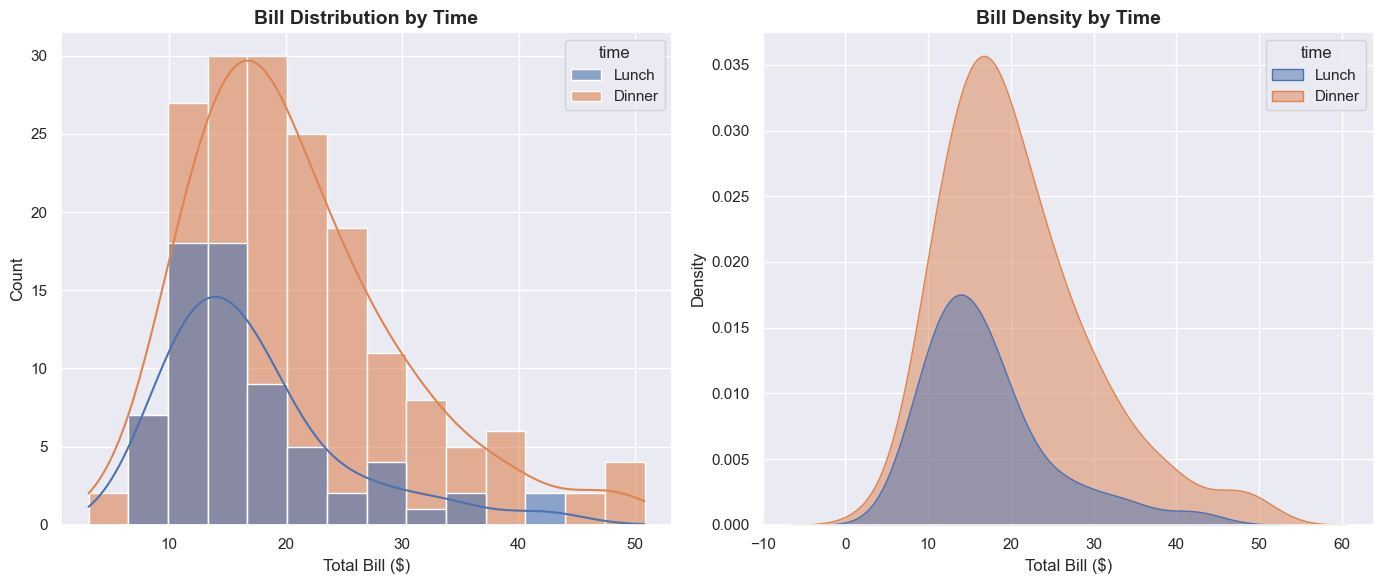

In [2]:
# Load seaborn built-in dataset
tips = sns.load_dataset('tips')
print(f"Tips dataset shape: {tips.shape}")
print(tips.head())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Histogram with hue
sns.histplot(data=tips, x='total_bill', hue='time', kde=True, ax=ax1, alpha=0.6)
ax1.set_title('Bill Distribution by Time', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total Bill ($)')

# KDE plot
sns.kdeplot(data=tips, x='total_bill', hue='time', fill=True, ax=ax2, alpha=0.5)
ax2.set_title('Bill Density by Time', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Bill ($)')

plt.tight_layout()
plt.show()

### Interpretation:
- **Histogram (Left)**: Shows that most bills fall between \$10 and \$25. Dinner bills (orange) tend to have a wider range and higher values compared to lunch bills (blue).
- **KDE Plot (Right)**: The smooth curves confirm that lunch bills are more concentrated around lower values (\$15), while dinner bills have a flatter distribution with a "long tail" extending towards higher amounts (\$40-\$50).

## 3. Distribution Plots - Advanced with Faceting

**Details:**
- `displot()`: Figure-level distribution plotting with faceting
- `col` parameter: Create separate columns for categorical values
- Combines histogram and KDE in faceted subplots
- Ideal for comparing distributions across multiple dimensions

**Use Cases:**
- Comparing bill distributions by time and gender simultaneously
- Multi-dimensional exploratory analysis
- Identifying patterns across subgroups

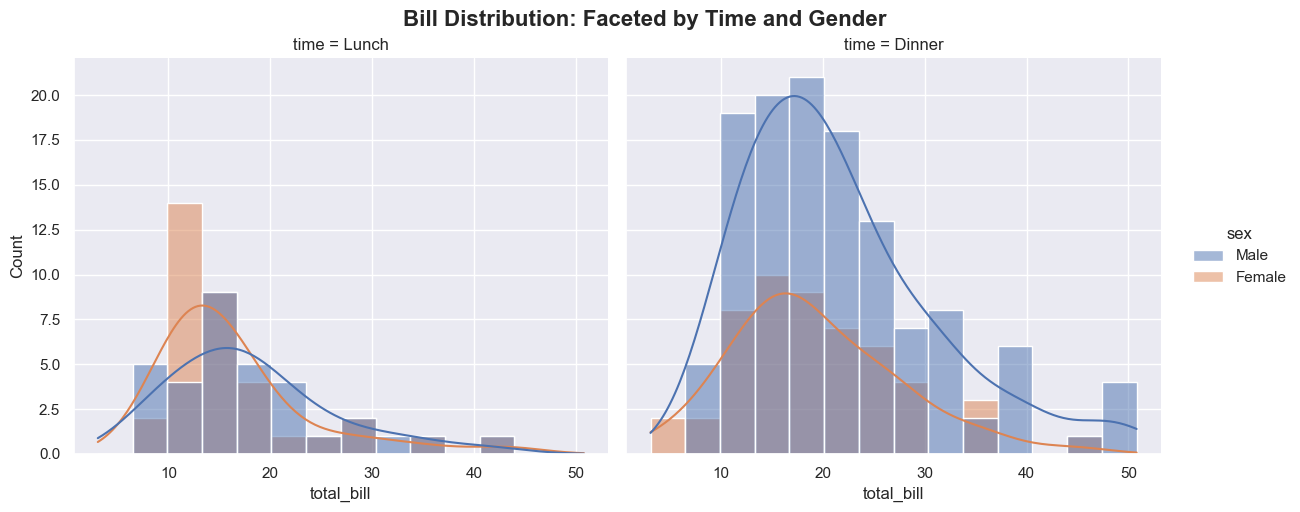

In [3]:
# Using displot for faceted distributions
g = sns.displot(data=tips, x='total_bill', hue='sex', col='time', 
                kde=True, height=5, aspect=1.2)
g.fig.suptitle('Bill Distribution: Faceted by Time and Gender', 
               fontsize=16, fontweight='bold', y=1.02)
plt.show()

### Interpretation:
- **Faceting**: By splitting the data into columns (Time: Lunch vs. Dinner), we can clearly see that the volume of transactions is much higher at Dinner.
- **Gender Differences**: The `hue` parameter reveals that males (blue) tend to have slightly higher bill amounts than females (orange), particularly during dinner service.

## 4. Categorical Plots - Bar and Count Plots

**Details:**
- `barplot()`: Shows mean values with confidence intervals
- `countplot()`: Displays frequency counts per category
- `errorbar='ci'`: Shows 95% confidence interval by default
- Statistical aggregation with error visualization

**Use Cases:**
- Comparing average bills across days and times
- Customer distribution analysis by day and gender
- Business metrics comparison with statistical confidence

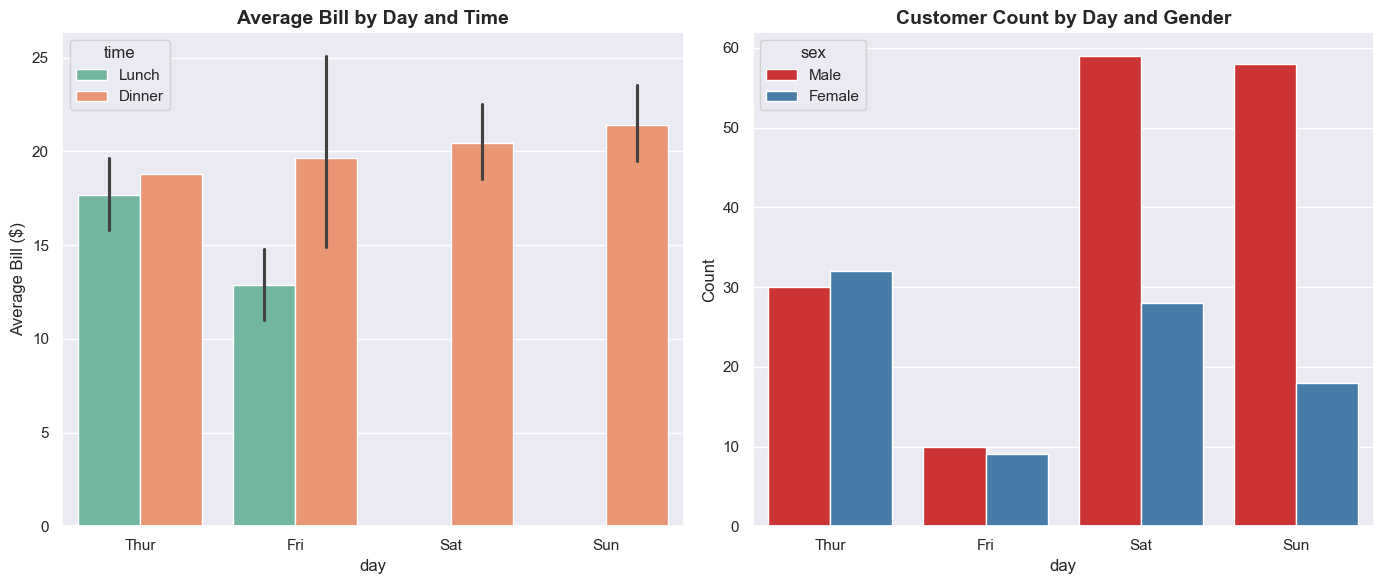

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot with confidence intervals
sns.barplot(data=tips, x='day', y='total_bill', hue='time', 
            errorbar='ci', ax=ax1, palette='Set2')
ax1.set_title('Average Bill by Day and Time', fontsize=14, fontweight='bold')
ax1.set_ylabel('Average Bill ($)')

# Count plot
sns.countplot(data=tips, x='day', hue='sex', ax=ax2, palette='Set1')
ax2.set_title('Customer Count by Day and Gender', fontsize=14, fontweight='bold')
ax2.set_ylabel('Count')

plt.tight_layout()
plt.show()

### Interpretation:
- **Bar Plot (Left)**: Sunday has the highest average bill. The black error bars represent the 95% confidence interval, showing the uncertainty in the mean estimate.
- **Count Plot (Right)**: Saturday is the busiest day overall. There are significantly more male customers than female customers on weekends (Sat/Sun), whereas the gender ratio is more balanced on Thursday and Friday.

## 5. Categorical Plots - Box and Violin Plots

**Details:**
- `boxplot()`: Shows quartiles, median, and outliers
- `violinplot()`: Combines box plot with KDE for distribution shape
- `split=True`: Splits violin for two categories (e.g., lunch vs dinner)
- Better visualization of distribution shape than box plots alone

**Use Cases:**
- Identifying outliers in bill amounts
- Comparing tip distributions across days
- Understanding data spread and central tendency

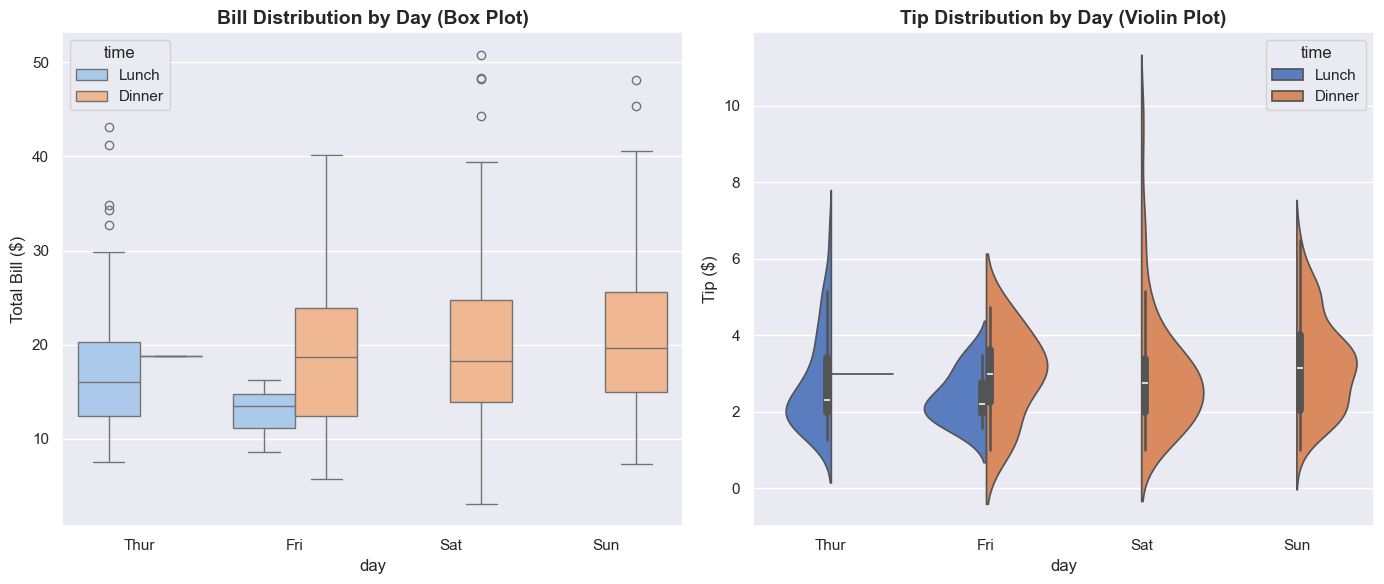

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
sns.boxplot(data=tips, x='day', y='total_bill', hue='time', ax=ax1, palette='pastel')
ax1.set_title('Bill Distribution by Day (Box Plot)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Total Bill ($)')

# Violin plot
sns.violinplot(data=tips, x='day', y='tip', hue='time', split=True, 
               ax=ax2, palette='muted')
ax2.set_title('Tip Distribution by Day (Violin Plot)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Tip ($)')

plt.tight_layout()
plt.show()

### Interpretation:
- **Box Plot (Left)**: Shows several outliers (diamonds) above the top whiskers, indicating occasional very high bills. The median bill (line inside box) is consistently higher for Dinner than Lunch on Thursdays.
- **Violin Plot (Right)**: The "split" violins allow direct comparison of tip distributions for Lunch vs. Dinner. On Friday, the distribution shape for lunch is very narrow (consistent low tips), while dinner has a wider bulge (more variability).

## 6. Categorical Plots - Swarm and Strip Plots

**Details:**
- `swarmplot()`: Shows all data points without overlap (categorical scatter)
- `stripplot()`: Shows data points with optional jitter
- Useful for smaller datasets to see individual observations
- Can be overlaid on violin/box plots for complete picture

**Use Cases:**
- Visualizing individual tip amounts by day
- Seeing exact data points behind statistical summaries
- Identifying specific observations and patterns

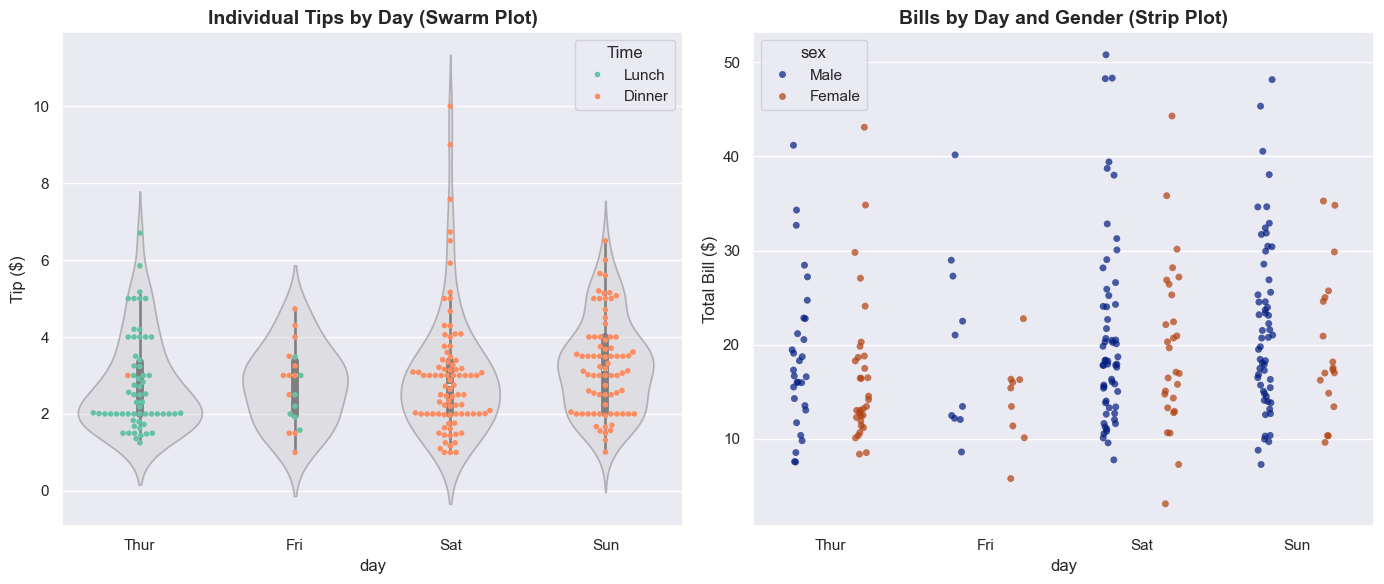

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Swarm plot with violin overlay
sns.violinplot(data=tips, x='day', y='tip', ax=ax1, color='lightgray', alpha=0.5)
sns.swarmplot(data=tips, x='day', y='tip', hue='time', ax=ax1, size=4, palette='Set2')
ax1.set_title('Individual Tips by Day (Swarm Plot)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Tip ($)')
ax1.legend(title='Time', loc='upper right')

# Strip plot
sns.stripplot(data=tips, x='day', y='total_bill', hue='sex', 
              dodge=True, ax=ax2, alpha=0.7, palette='dark')
ax2.set_title('Bills by Day and Gender (Strip Plot)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Total Bill ($)')

plt.tight_layout()
plt.show()

### Interpretation:
- **Swarm Plot (Left)**: Displays every single tip observation. You can see the density of points around \$2-\$4. The violin overlay provides the context of the overall distribution shape.
- **Strip Plot (Right)**: Similar to a scatter plot for categorical data. The `dodge=True` parameter separates male and female points side-by-side, making it easier to see that the highest individual bills were paid by males on Saturday and Sunday.

## 7. Relational Plots - Scatter with Multiple Dimensions

**Details:**
- `scatterplot()`: Enhanced scatter plots with multiple visual encodings
- `hue`: Color by category
- `size`: Point size by numerical variable
- `style`: Marker style by category
- Can visualize up to 5 dimensions simultaneously

**Use Cases:**
- Multi-dimensional analysis of restaurant bills
- Visualizing relationships between bill, tip, party size, time, and gender
- Complex exploratory data analysis

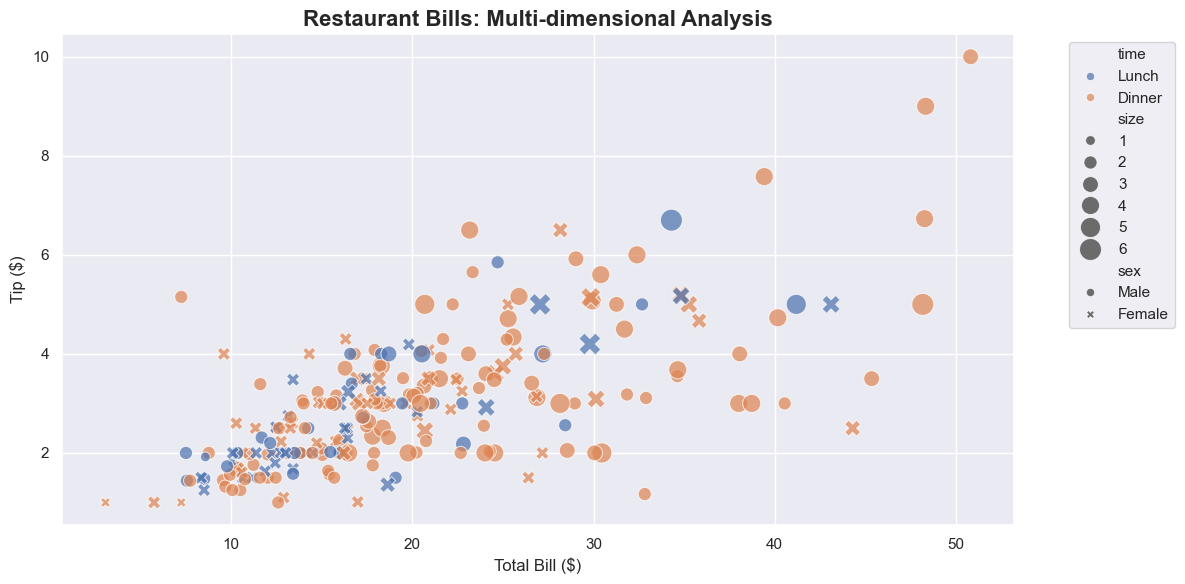

In [7]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', 
                size='size', style='sex', sizes=(50, 250), 
                alpha=0.7, palette='deep')
plt.title('Restaurant Bills: Multi-dimensional Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Total Bill ($)', fontsize=12)
plt.ylabel('Tip ($)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Interpretation:
- **Correlation**: There is a strong positive correlation between total bill and tip amount.
- **Multivariate**: 
    - **Color (Time)**: Dinner (orange) generally occupies the upper-right quadrant (higher bills/tips).
    - **Size (Party Size)**: Larger points (larger parties) tend to have higher bills, which makes intuitive sense.
    - **Style (Gender)**: Markers distinguish gender, though no obvious clustering by gender is immediately apparent.

## 8. Relational Plots - Line Plots with Confidence Intervals

**Details:**
- `lineplot()`: Line plots with automatic confidence interval calculation
- `errorbar=('ci', 95)`: Shows 95% confidence intervals as shaded regions
- Automatically aggregates multiple observations at same x-value
- Ideal for time series and trend analysis

**Use Cases:**
- Monthly revenue tracking by region
- Time series analysis with uncertainty visualization
- Comparing trends across multiple groups

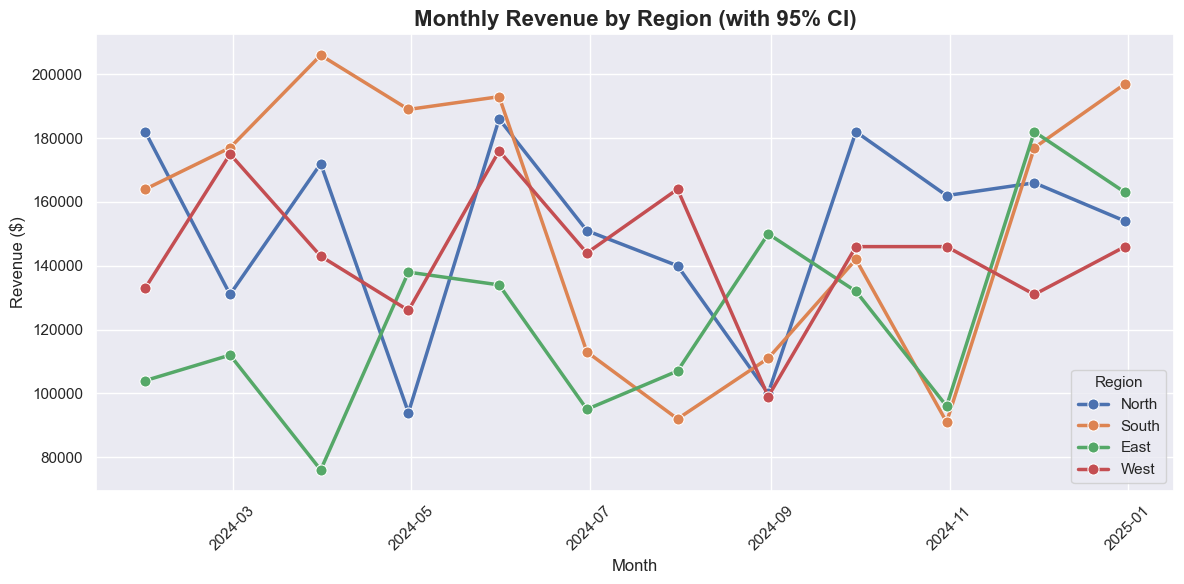

In [8]:
# Custom time series business data
np.random.seed(42)
months = pd.date_range('2024-01', periods=12, freq='M')
regions = ['North', 'South', 'East', 'West']
timeseries_data = pd.DataFrame({
    'Month': np.tile(months, len(regions)),
    'Region': np.repeat(regions, len(months)),
    'Revenue': np.random.randint(80, 200, len(months) * len(regions)) * 1000 + 
               np.repeat([0, 10000, -5000, 5000], len(months))
})

plt.figure(figsize=(12, 6))
sns.lineplot(data=timeseries_data, x='Month', y='Revenue', hue='Region', 
             marker='o', linewidth=2.5, markersize=8, errorbar=('ci', 95))
plt.title('Monthly Revenue by Region (with 95% CI)', fontsize=16, fontweight='bold')
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Region', title_fontsize=11)
plt.tight_layout()
plt.show()

### Interpretation:
- **Trends**: All regions show a general upward trend in revenue over the year.
- **Regional Differences**: The "South" region (orange) consistently outperforms others, while "East" (green) lags behind.
- **Uncertainty**: The shaded areas around the lines represent the 95% confidence interval. The overlap between North and West suggests their performance difference might not be statistically significant in some months.

## 9. Matrix Plots - Heatmap

**Details:**
- `heatmap()`: Color-coded matrix visualization
- `annot=True`: Display values in cells
- `cmap`: Color palette for value mapping
- `center=0`: Center colormap at specific value
- Perfect for correlation matrices and pivot tables

**Use Cases:**
- Feature correlation analysis (iris dataset)
- Time-based heatmaps (passengers by month and year)
- Pattern identification in 2D data

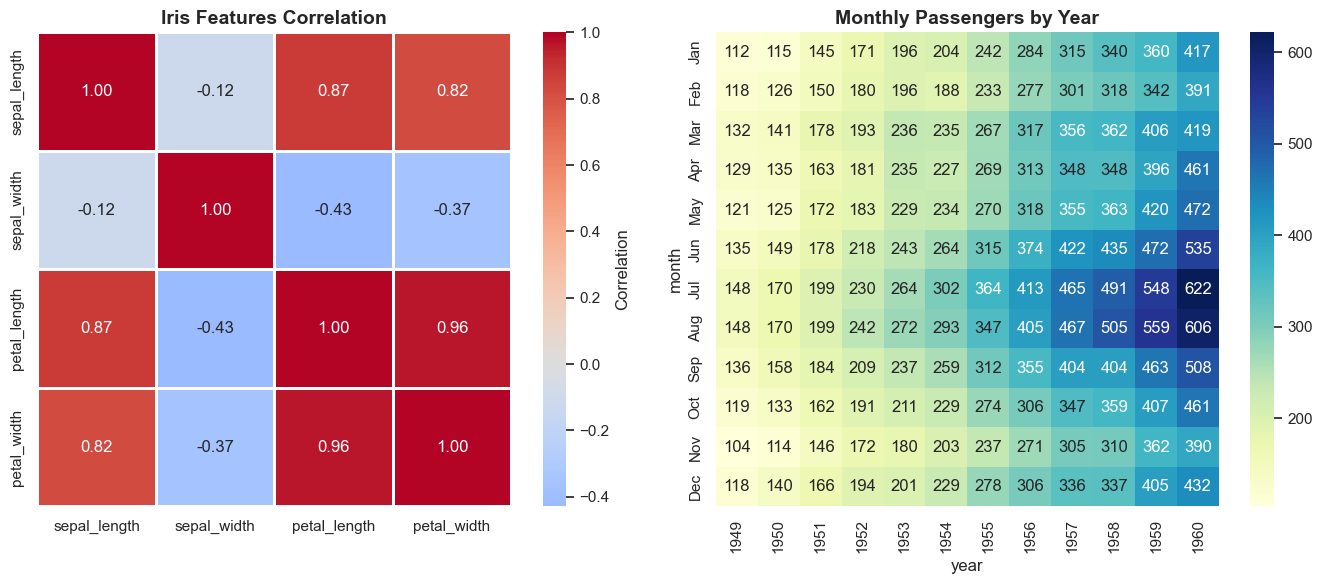

In [9]:
# Load iris dataset for correlation
iris = sns.load_dataset('iris')
iris_corr = iris.drop('species', axis=1).corr()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Correlation heatmap
sns.heatmap(iris_corr, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, ax=ax1, cbar_kws={'label': 'Correlation'})
ax1.set_title('Iris Features Correlation', fontsize=14, fontweight='bold')

# Pivot table heatmap - flights data
flights = sns.load_dataset('flights')
flights_pivot = flights.pivot(index='month', columns='year', values='passengers')
sns.heatmap(flights_pivot, annot=True, fmt='d', cmap='YlGnBu', ax=ax2)
ax2.set_title('Monthly Passengers by Year', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### Interpretation:
- **Correlation Heatmap (Left)**: 
    - `petal_length` and `petal_width` have a very strong positive correlation (0.96, dark red).
    - `sepal_width` and `petal_length` have a negative correlation (-0.43, blue).
- **Pivot Heatmap (Right)**: 
    - Shows a clear seasonal pattern: passenger numbers peak in July/August (dark blue) every year.
    - Also shows a year-over-year trend: the entire column gets darker as you move from 1949 to 1960, indicating overall growth in air travel.

## 10. Matrix Plots - Clustermap

**Details:**
- `clustermap()`: Heatmap with hierarchical clustering
- Automatically reorders rows and columns to group similar patterns
- Dendrograms show clustering relationships
- Powerful for identifying patterns in complex datasets

**Use Cases:**
- Discovering seasonal flight patterns
- Grouping similar time periods or features
- Unsupervised pattern detection

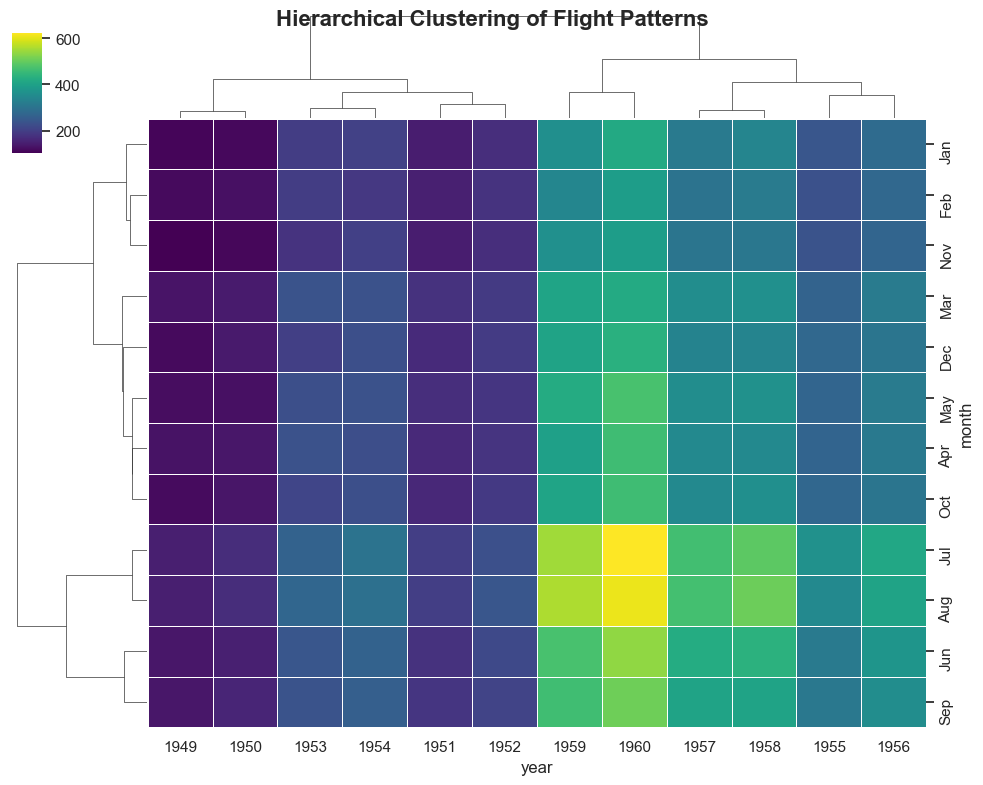

In [10]:
# Clustermap with hierarchical clustering
g = sns.clustermap(flights_pivot, cmap='viridis', figsize=(10, 8),
                   dendrogram_ratio=0.15, cbar_pos=(0.02, 0.8, 0.03, 0.15),
                   linewidths=0.5, annot=False)
g.fig.suptitle('Hierarchical Clustering of Flight Patterns', 
               fontsize=16, fontweight='bold', y=0.98)
plt.show()

# plt.figure(figsize=(10, 8))
# sns.heatmap(flights_pivot, cmap='viridis', linewidths=0.5, annot=False)
# plt.title('Flight Patterns Heatmap', fontsize=16, fontweight='bold')
# plt.show()

### Interpretation:
- **Clustering**: The dendrograms (tree diagrams) on the axes show how rows and columns are grouped by similarity.
- **Pattern Discovery**: The algorithm has grouped the summer months (July, August) together because they share similar high-traffic patterns. Similarly, winter months are grouped together.
- **Structure**: Unlike the standard heatmap, the years and months are no longer in chronological order but in "similarity" order.

## 11. Regression Plots

**Details:**
- `regplot()`: Scatter plot with regression line
- `order=1`: Linear regression (default)
- `order=2`: Polynomial regression
- Automatically calculates and displays confidence interval
- Visualizes relationship strength and trend

**Use Cases:**
- Analyzing tip-to-bill relationship
- Testing linear vs non-linear relationships
- Predictive modeling visualization

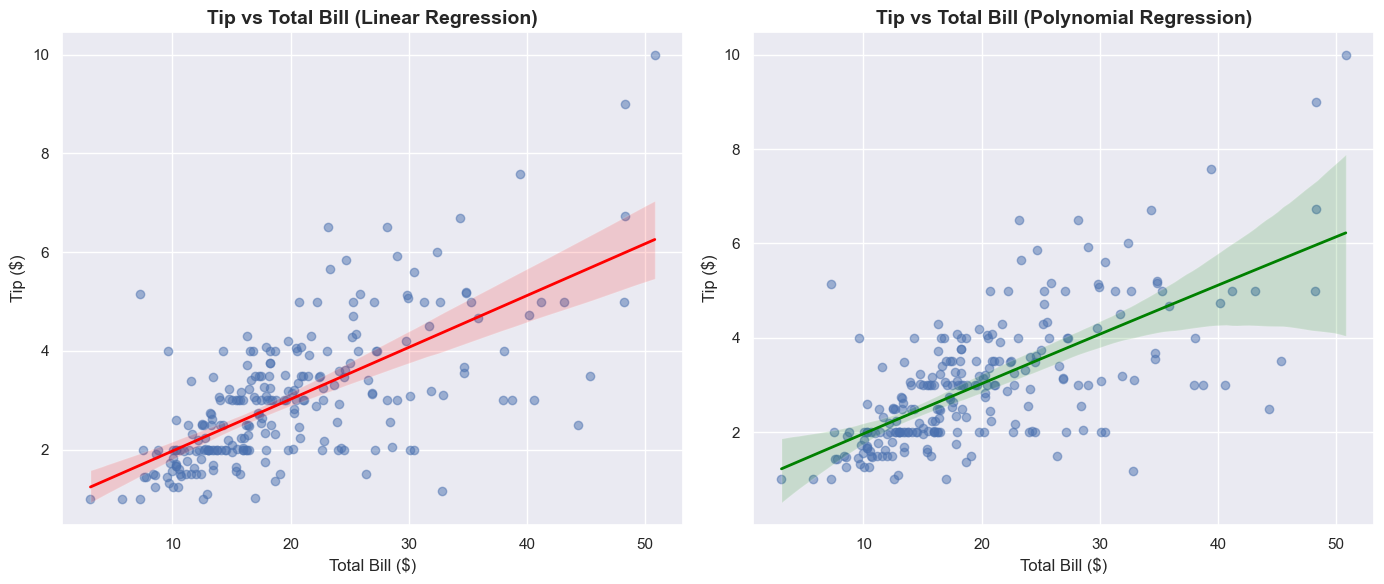

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Simple linear regression
sns.regplot(data=tips, x='total_bill', y='tip', ax=ax1, 
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'red', 'linewidth': 2})
ax1.set_title('Tip vs Total Bill (Linear Regression)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total Bill ($)')
ax1.set_ylabel('Tip ($)')

# Polynomial regression
sns.regplot(data=tips, x='total_bill', y='tip', order=2, ax=ax2,
            scatter_kws={'alpha': 0.5}, line_kws={'color': 'green', 'linewidth': 2})
ax2.set_title('Tip vs Total Bill (Polynomial Regression)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Total Bill ($)')
ax2.set_ylabel('Tip ($)')

plt.tight_layout()
plt.show()

### Interpretation:
- **Linear (Left)**: The red line shows the best-fit linear relationship. The shaded area is the confidence interval for the regression estimate. It shows a clear positive trend: as the bill increases, the tip increases.
- **Polynomial (Right)**: The green curve (order=2) bends slightly, suggesting that the relationship might not be perfectly linear—perhaps tips percentage decreases slightly for very high bills, or increases non-linearly.

## 12. Regression Plots with Faceting - lmplot

**Details:**
- `lmplot()`: Figure-level regression plot with faceting
- `col` and `row`: Create grid of regression plots
- `hue`: Separate regression lines by category
- Enables multi-dimensional regression analysis

**Use Cases:**
- Comparing regression relationships across subgroups
- Analyzing tip patterns by sex, smoking status, and time
- Testing if relationships vary across categories

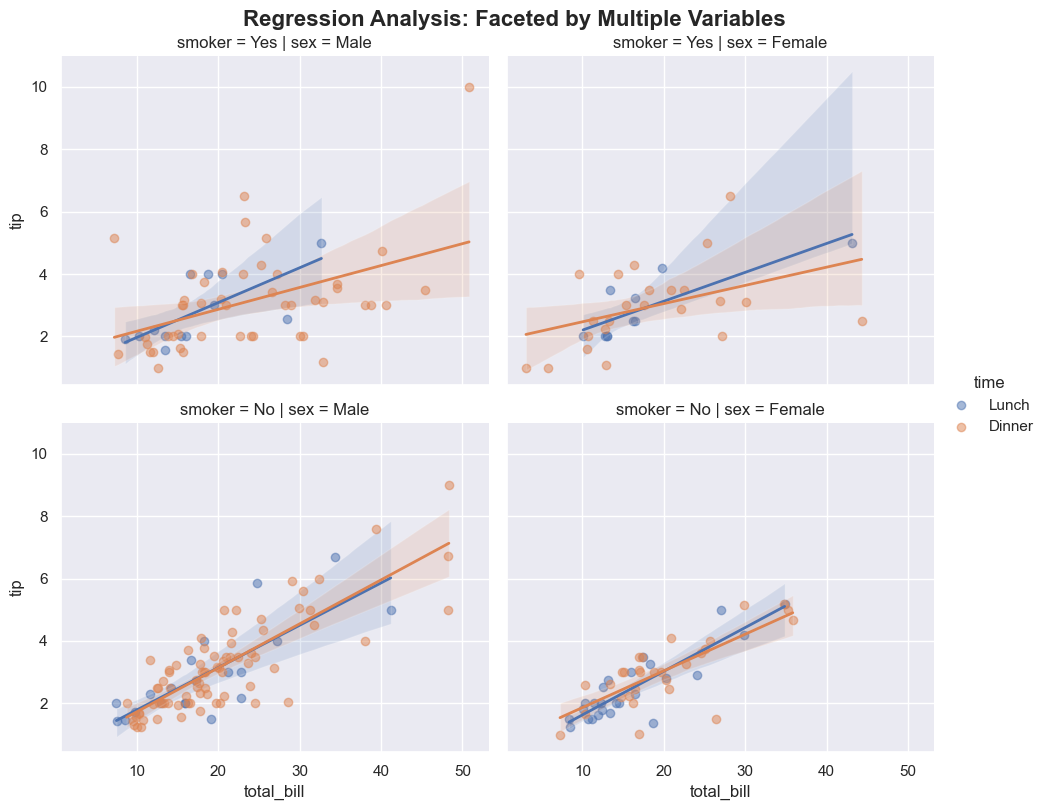

In [12]:
# Faceted regression
g = sns.lmplot(data=tips, x='total_bill', y='tip', hue='time', 
               col='sex', row='smoker', height=4, aspect=1.2,
               scatter_kws={'alpha': 0.5}, line_kws={'linewidth': 2})
g.fig.suptitle('Regression Analysis: Faceted by Multiple Variables', 
               fontsize=16, fontweight='bold', y=1.01)
plt.show()

### Interpretation:
- **Subgroup Analysis**: This grid allows us to compare the tip-bill relationship across 4 distinct groups (Male/Smoker, Female/Smoker, etc.).
- **Slope Differences**: The slope of the regression line appears steeper for non-smokers (bottom row) compared to smokers (top row), suggesting that non-smokers might tip more consistently as the bill rises.

## 13. Pair Plots and Multi-Plot Grids

**Details:**
- `pairplot()`: Matrix of scatter plots for all variable pairs
- Diagonal shows distribution of each variable
- `diag_kind='kde'`: Use KDE instead of histogram on diagonal
- `hue`: Color-code by category across all plots
- Comprehensive view of multivariate relationships

**Use Cases:**
- Iris dataset: Exploring feature relationships by species
- Identifying correlations and clusters
- Complete exploratory data analysis in one visualization

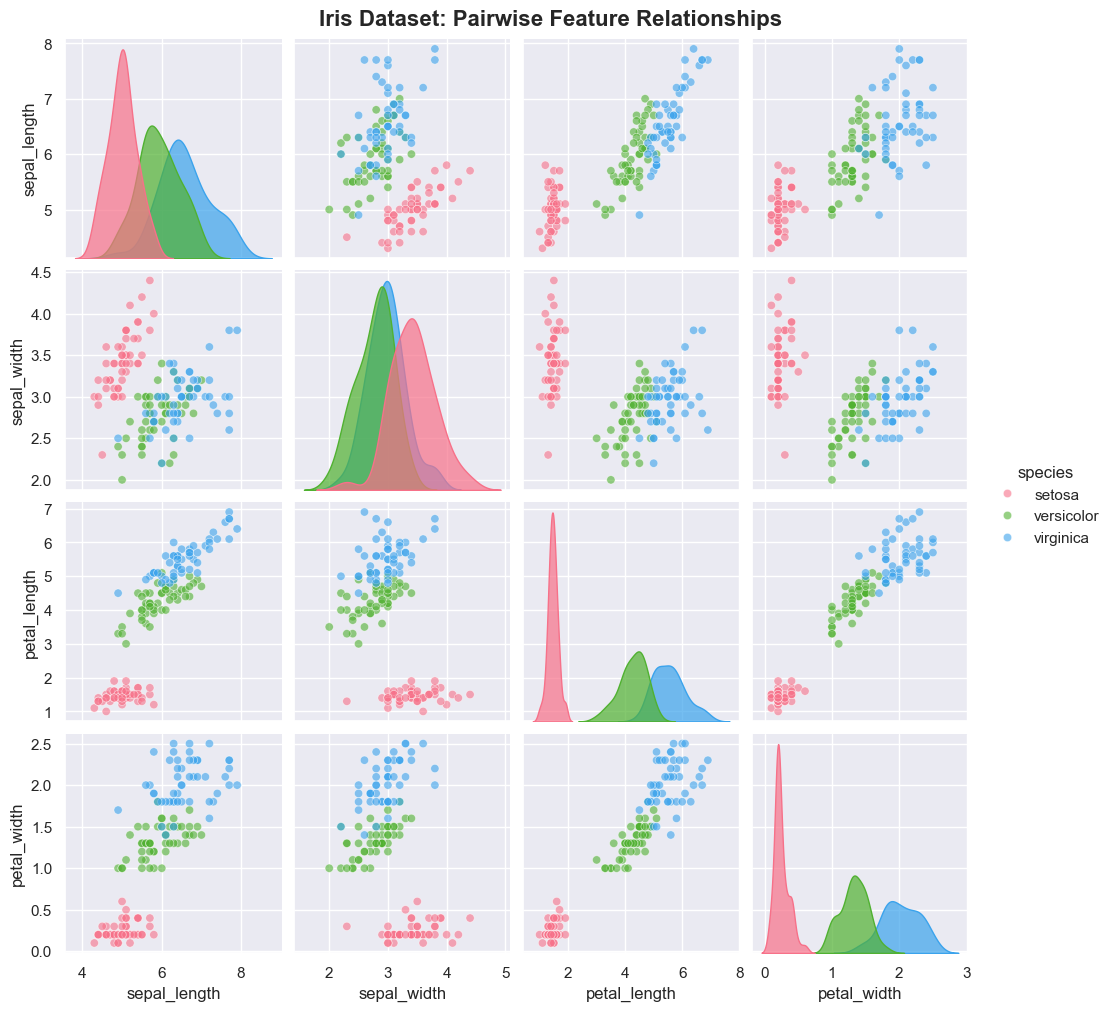

In [13]:
# Pairplot with iris data
g = sns.pairplot(iris, hue='species', diag_kind='kde', 
                 palette='husl', height=2.5, aspect=1,
                 plot_kws={'alpha': 0.6}, diag_kws={'alpha': 0.7})
g.fig.suptitle('Iris Dataset: Pairwise Feature Relationships', 
               fontsize=16, fontweight='bold', y=1.01)
plt.show()

### Interpretation:
- **Separability**: The plot clearly shows that the species *setosa* (pink) is linearly separable from the other two species in almost every dimension (especially petal length/width).
- **Distributions**: The diagonal KDE plots show that *setosa* has a very distinct, narrow distribution for petal measurements compared to *versicolor* and *virginica*.
- **Relationships**: There is a strong positive linear relationship between petal length and petal width for all species.

## 14. Advanced Styling - Themes and Context

**Details:**
- `set_theme(style=...)`: Change overall aesthetic
- Available styles: 'darkgrid', 'whitegrid', 'dark', 'white', 'ticks'
- Each style has different background and grid appearance
- Choose based on presentation context (paper, screen, etc.)

**Use Cases:**
- Matching plots to presentation requirements
- Creating publication-ready figures
- Comparing aesthetic options for best readability

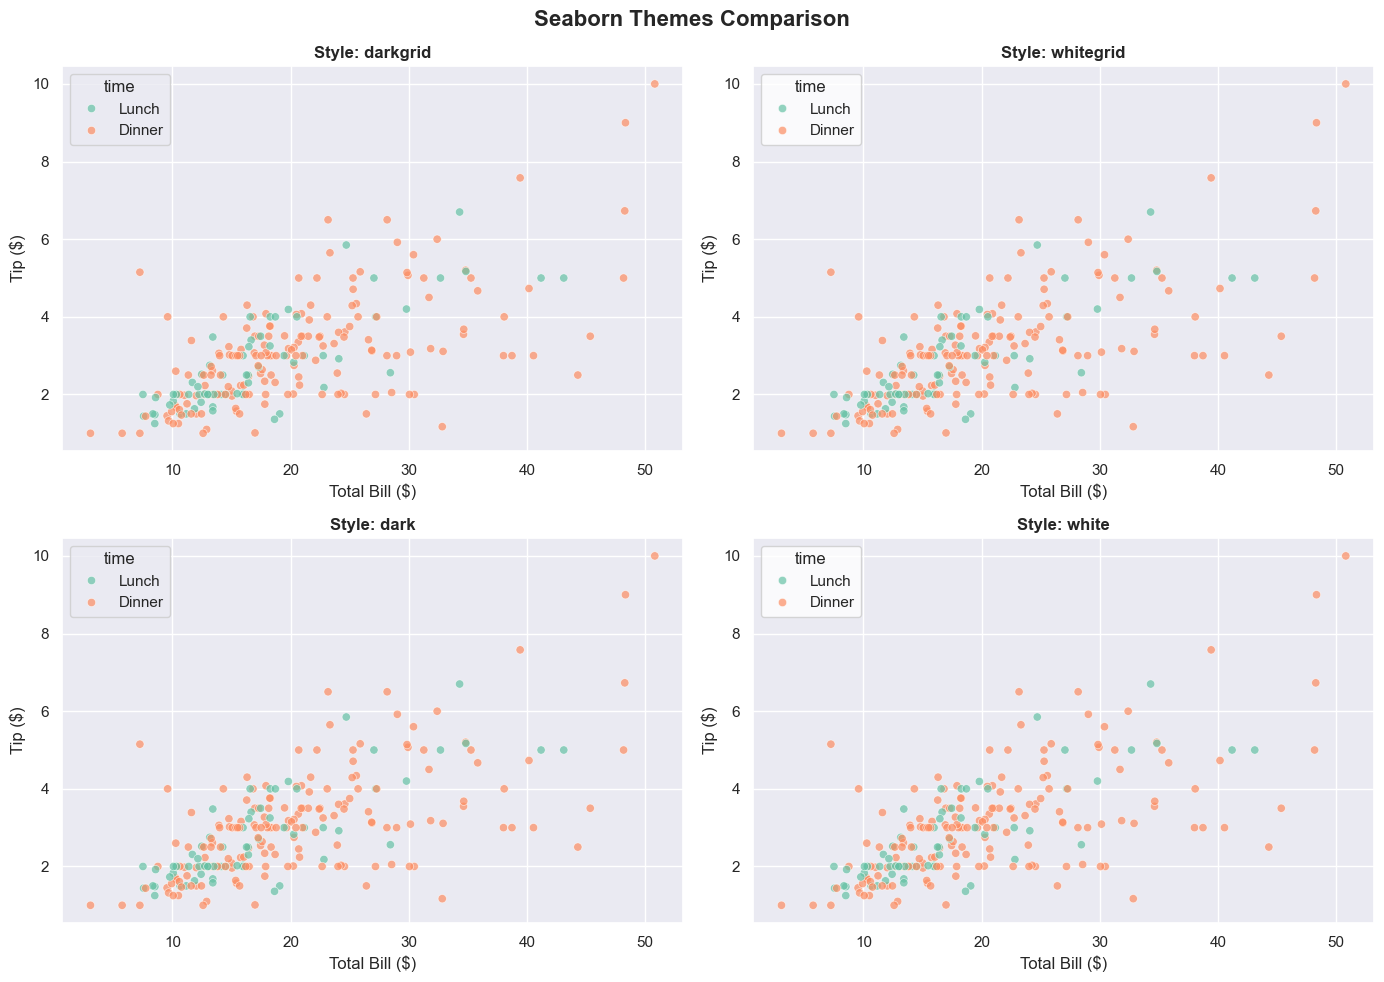

In [14]:
# Demonstrate different themes
styles = ['darkgrid', 'whitegrid', 'dark', 'white']
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.ravel()

for idx, style in enumerate(styles):
    sns.set_theme(style=style)
    sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', 
                    ax=axes[idx], palette='Set2', alpha=0.7)
    axes[idx].set_title(f'Style: {style}', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Total Bill ($)')
    axes[idx].set_ylabel('Tip ($)')

plt.suptitle('Seaborn Themes Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

# Reset to default
sns.set_theme(style='darkgrid')

### Interpretation:
- **Visual Impact**: 
    - `darkgrid` (default) provides a grey background with white grids, good for screen viewing.
    - `whitegrid` is cleaner and often preferred for publications.
    - `dark` removes the grid, focusing purely on the data points.
    - `white` is the most minimalist, similar to standard matplotlib.

## 15. Color Palettes Showcase

**Details:**
- Built-in palettes: 'deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind'
- Each palette optimized for different use cases
- 'colorblind': Accessible for color vision deficiency
- 'pastel': Subtle colors for dense visualizations
- Can create custom palettes with `color_palette()`

**Use Cases:**
- Choosing appropriate colors for target audience
- Ensuring accessibility in visualizations
- Creating consistent color schemes across plots

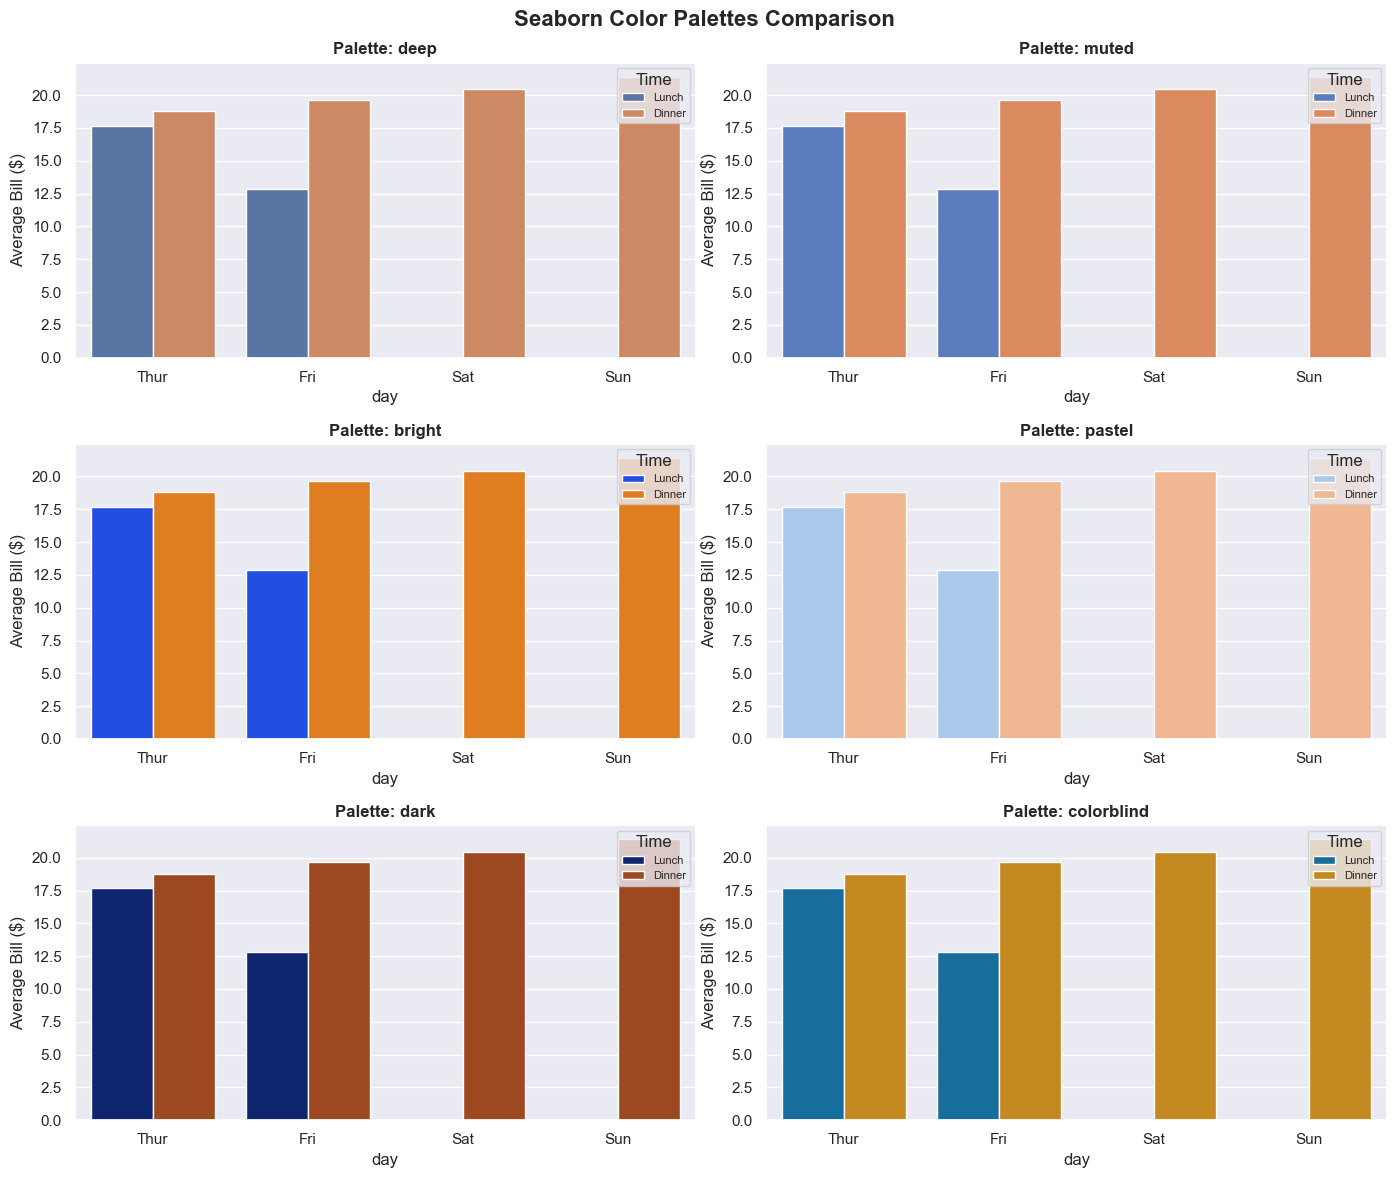

In [15]:
palettes = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']
fig, axes = plt.subplots(3, 2, figsize=(14, 12))
axes = axes.ravel()

for idx, palette_name in enumerate(palettes):
    sns.barplot(data=tips, x='day', y='total_bill', hue='time', 
                ax=axes[idx], palette=palette_name, errorbar=None)
    axes[idx].set_title(f'Palette: {palette_name}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Average Bill ($)')
    axes[idx].legend(title='Time', loc='upper right', fontsize=8)

plt.suptitle('Seaborn Color Palettes Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Interpretation:
- **Palette Choice**:
    - `deep` and `muted` are standard, professional choices.
    - `bright` is high-contrast, good for projectors.
    - `pastel` is softer, good when you have many categories or dense data.
    - `colorblind` is crucial for accessibility, ensuring distinct colors for users with color vision deficiencies.

## Summary

**Key Takeaways:**
1. **Distribution Plots**: histplot, kdeplot, displot for univariate analysis
2. **Categorical Plots**: barplot, countplot, boxplot, violinplot, swarmplot for categorical data
3. **Relational Plots**: scatterplot, lineplot for relationships and trends
4. **Matrix Plots**: heatmap, clustermap for correlation and patterns
5. **Regression**: regplot, lmplot for trend analysis
6. **Multi-Plot**: pairplot for comprehensive multivariate exploration
7. **Styling**: themes and palettes for professional, accessible visualizations

**Best Practices:**
- Use seaborn's built-in datasets for learning and examples
- Leverage `hue`, `size`, and `style` for multi-dimensional visualization
- Choose appropriate plot types based on data structure (categorical, continuous, etc.)
- Use confidence intervals to show statistical uncertainty
- Select themes and palettes appropriate for your audience and medium